# Interesting questies of the dataset

In [8]:
import learn2therm.database
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
db =learn2therm.database.L2TDatabase('../data/database')

### How many meso philes per thermophile and vice versa

In [9]:
results = db.execute("""
    SELECT COUNT(DISTINCT "thermo_protein_int_index") FROM protein_pairs GROUP BY meso_protein_int_index
""")

In [15]:
results.describe()

,count(DISTINCT thermo_protein_int_index)
count,6.410621e+06
mean,2.831247e+01
std,7.247288e+01
min,1.000000e+00
25%,3.000000e+00
50%,7.000000e+00
75%,1.900000e+01
max,9.160000e+02


<AxesSubplot: ylabel='Count'>

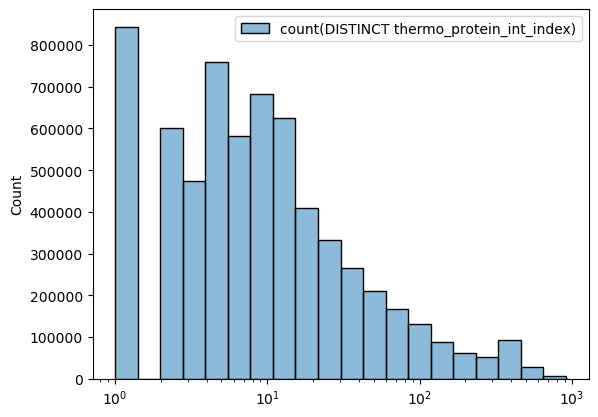

In [14]:
sns.histplot(results, log_scale=True, bins=20)

> 75% of mesophiles have > 3 thermophiles, but this is without pair quality filtering.

In [16]:
results = db.execute("""
    SELECT COUNT(DISTINCT "meso_protein_int_index") FROM protein_pairs GROUP BY thermo_protein_int_index
""")

In [17]:
results.describe()

,count(DISTINCT meso_protein_int_index)
count,301597.000000
mean,601.798101
std,3358.442317
min,1.000000
25%,4.000000
50%,28.000000
75%,156.000000
max,61700.000000


<AxesSubplot: ylabel='Count'>

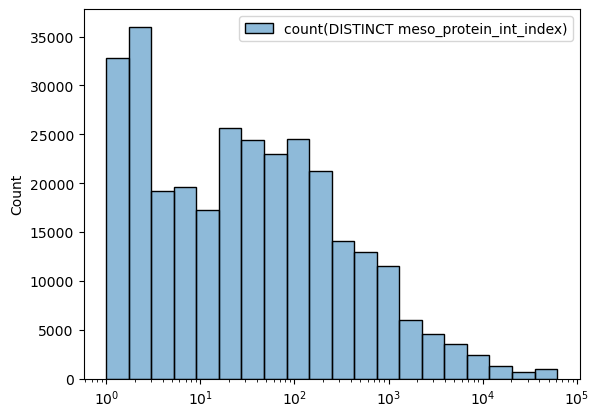

In [18]:
sns.histplot(results, log_scale=True, bins=20)

> 75% of thermophiles have > 4 mesophiles, but this is without pair quality filtering. Also we dont care much about this direction. THere are a significant number with a crap ton of mesophiles